<a href="https://colab.research.google.com/github/Sreerag-Pillai/Data_Science/blob/main/SMA_divergence_support_resistance_trading_algorythm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance yfinance backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 8.0 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


<ipython-input-3-029d046fff2a>:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Support'] = pd.Series(index=df.index)
<ipython-input-3-029d046fff2a>:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df['Resistance'] = pd.Series(index=df.index)
<ipython-input-3-029d046fff2a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Support'][i] = df['Low'][i]
<ipython-input-3-029d046fff2a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

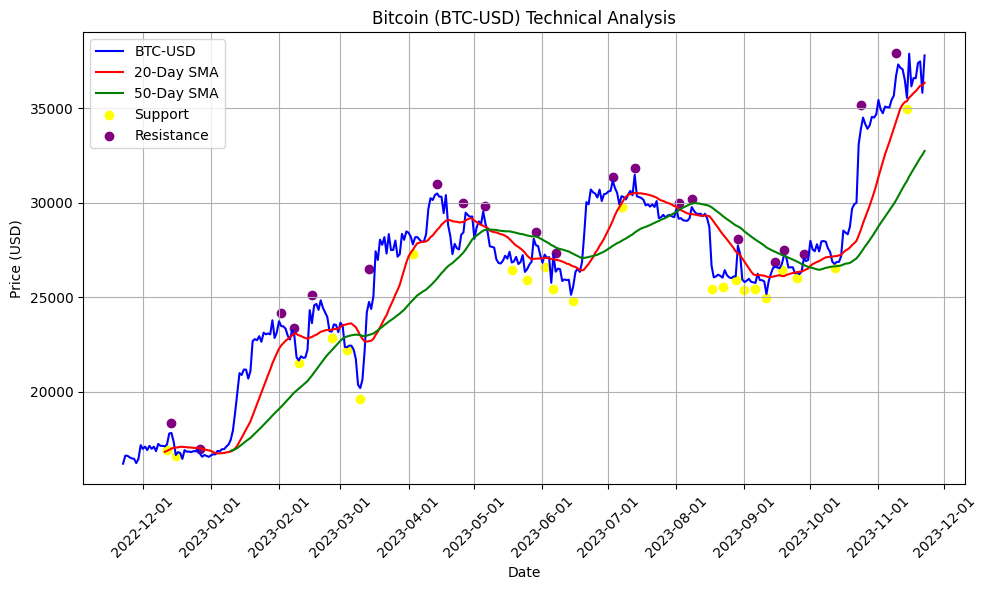

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
import mplfinance as mpf

# Download historical data for Bitcoin
btc = yf.download(tickers='BTC-USD', period='1y', interval='1d')

# Define a function to identify technical patterns like support, resistance, and potential double tops or bottoms
def identify_technical_patterns(df):
    # Calculate simple moving averages
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['SMA50'] = df['Close'].rolling(window=50).mean()

    # Initialize columns for support and resistance levels
    df['Support'] = pd.Series(index=df.index)
    df['Resistance'] = pd.Series(index=df.index)

    # Identify support and resistance levels
    for i in range(2, df.shape[0] - 2):
        # Support
        if df['Low'][i] < df['Low'][i - 1] < df['Low'][i - 2] and df['Low'][i] < df['Low'][i + 1] < df['Low'][i + 2]:
            df['Support'][i] = df['Low'][i]

        # Resistance
        if df['High'][i] > df['High'][i - 1] > df['High'][i - 2] and df['High'][i] > df['High'][i + 1] > df['High'][i + 2]:
            df['Resistance'][i] = df['High'][i]

    return df

# Apply the technical analysis function
btc_analyzed = identify_technical_patterns(btc)

# Plotting
register_matplotlib_converters()

# Set up the plot
plt.figure(figsize=(10,6))
plt.plot(btc_analyzed['Close'], label='BTC-USD', color='blue')
plt.plot(btc_analyzed['SMA20'], label='20-Day SMA', color='red')
plt.plot(btc_analyzed['SMA50'], label='50-Day SMA', color='green')

# Plot support and resistance
plt.scatter(btc_analyzed.index, btc_analyzed['Support'], label='Support', color='yellow')
plt.scatter(btc_analyzed.index, btc_analyzed['Resistance'], label='Resistance', color='purple')

plt.title('Bitcoin (BTC-USD) Technical Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import backtrader as bt
import yfinance as yf

class BitcoinStrategy(bt.Strategy):
    params = (('sma_period', 20),)

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_period)

    def log(self, txt, dt=None):
        ''' Logging function '''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def next(self):
        if not self.position:  # not in the market
            if self.data.close > self.sma:  # if closing price is above SMA
                self.log(f'BUY CREATE, {self.data.close[0]}')
                self.buy()
        elif self.data.close < self.sma:  # in the market & closing price is below SMA
            self.log(f'SELL CREATE, {self.data.close[0]}')
            self.sell()

# Download data
data = bt.feeds.PandasData(dataname=yf.download('BTC-USD', '2020-01-01', '2021-01-01'))

# Set up Cerebro
cerebro = bt.Cerebro()
cerebro.addstrategy(BitcoinStrategy)
cerebro.adddata(data)

# Set the initial cash
cerebro.broker.set_cash(10000)

# Set the commission - simulate more realistic trading conditions
cerebro.broker.setcommission(commission=0.001)

# Print the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the strategy
cerebro.run()

# Print the final conditions
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Plot the result (optional)
cerebro.plot()


[*********************100%%**********************]  1 of 1 completed
Starting Portfolio Value: 10000.00
2020-01-20 BUY CREATE, 8657.642578125
2020-01-25 SELL CREATE, 8367.84765625
2020-01-26 BUY CREATE, 8596.830078125
2020-02-17 SELL CREATE, 9690.142578125
2020-02-18 BUY CREATE, 10141.99609375
2020-02-19 SELL CREATE, 9633.38671875
2020-02-23 BUY CREATE, 9924.515625
2020-02-24 SELL CREATE, 9650.1748046875
2020-03-24 BUY CREATE, 6734.8037109375
2020-03-29 SELL CREATE, 5922.04296875
2020-03-30 BUY CREATE, 6429.841796875
2020-04-15 SELL CREATE, 6642.10986328125
2020-04-16 BUY CREATE, 7116.80419921875
2020-04-20 SELL CREATE, 6881.95849609375
2020-04-22 BUY CREATE, 7117.20751953125
2020-05-21 SELL CREATE, 9081.76171875
2020-05-28 BUY CREATE, 9525.7509765625
2020-06-11 SELL CREATE, 9321.78125
2020-06-22 BUY CREATE, 9648.7177734375
2020-06-24 SELL CREATE, 9313.6103515625
2020-07-06 BUY CREATE, 9375.474609375
2020-07-07 SELL CREATE, 9252.27734375
2020-07-08 BUY CREATE, 9428.3330078125
2020-07-1

[[<Figure size 640x480 with 4 Axes>]]

In [ ]:
import backtrader as bt
import yfinance as yf

class DivergenceStrategy(bt.Strategy):
    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)
        self.last_rsi = None
        self.last_price = None

    def log(self, txt, dt=None):
        ''' Logging function '''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def next(self):
        if self.last_rsi and self.last_price:
            # Check for bullish divergence
            if self.data.close[0] > self.last_price and self.rsi[0] < self.last_rsi:
                self.log('Bullish Divergence, BUY CREATE, %.2f' % self.data.close[0])
                self.buy()
            # Check for bearish divergence
            elif self.data.close[0] < self.last_price and self.rsi[0] > self.last_rsi:
                self.log('Bearish Divergence, SELL CREATE, %.2f' % self.data.close[0])
                self.sell()

        # Update last price and RSI
        self.last_rsi = self.rsi[0]
        self.last_price = self.data.close[0]

# Download data
data = bt.feeds.PandasData(dataname=yf.download('BTC-USD', '2020-01-01', '2021-01-01'))

# Set up Cerebro
cerebro = bt.Cerebro()
cerebro.addstrategy(DivergenceStrategy)
cerebro.adddata(data)

# Set initial cash and commission
cerebro.broker.set_cash(10000)
cerebro.broker.setcommission(commission=0.001)

# Run the strategy
cerebro.run()

# Plot the results
cerebro.plot()


[*********************100%%**********************]  1 of 1 completed


[[<Figure size 640x480 with 5 Axes>]]